# 1 . Undersanding the Problem 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

* Survived - > 0 NO and 1 YES

* Pcalass -3 Lower , 2 Middle , 1 Upper

* Sex

* Tciket Number

* Name

* Age

* Parch

* Sibsb


# 2 . Loading data and Libraries

In [112]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# warnings
import warnings
warnings.filterwarnings('ignore')

#train_test_split
from sklearn.model_selection import train_test_split

#importing Standard scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

#importing algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree

#importing ensemble algorithm
from sklearn.ensemble import VotingClassifier

#importing Bagging Classifiers
from sklearn.ensemble import RandomForestClassifier

#importing Boosting calssifiers
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb

#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

#importing accuracy and cross val parameters
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [113]:
df = pd.read_csv('train.csv') #train data

df_test = pd.read_csv('test.csv') #test data


In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
#checking null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
#checking duplicates
df.duplicated().sum()

0

In [117]:
#checking format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3 .Exploratory Data analysis

### 3.1 Numerical analysis

In [118]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [119]:
#Survives
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [120]:
#Understanding deaths per categorical column

num = ['Pclass','Embarked','Sex']

for i in num:
    grp_analysis = df.groupby([i,'Survived'])['Survived'].count()
    print(grp_analysis)
    print('-------------------------------------------------------------------------')

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64
-------------------------------------------------------------------------
Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64
-------------------------------------------------------------------------
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
-------------------------------------------------------------------------


In [121]:
#statsical values

df.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


In [122]:
#checking correlation matrix
df.corr(numeric_only=True).round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


### 3.2 Visualisation

In [123]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


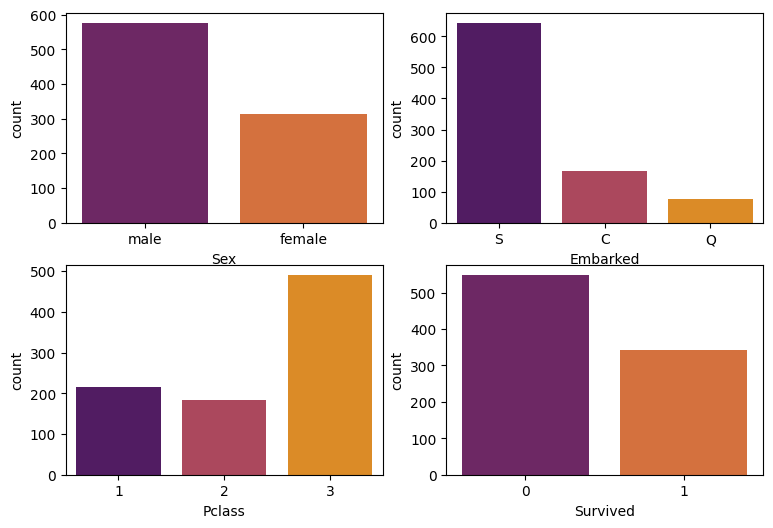

In [124]:
plt.subplots(2,2,figsize=(9,6))

plt.subplot(221)
sns.countplot(data=df, x='Sex',palette='inferno')


plt.subplot(222)
sns.countplot(data=df, x='Embarked',palette='inferno')

plt.subplot(223)
sns.countplot(data=df , x='Pclass',palette='inferno')

plt.subplot(224)
sns.countplot(data=df , x='Survived',palette='inferno')

plt.show()

<Axes: xlabel='Survived', ylabel='count'>

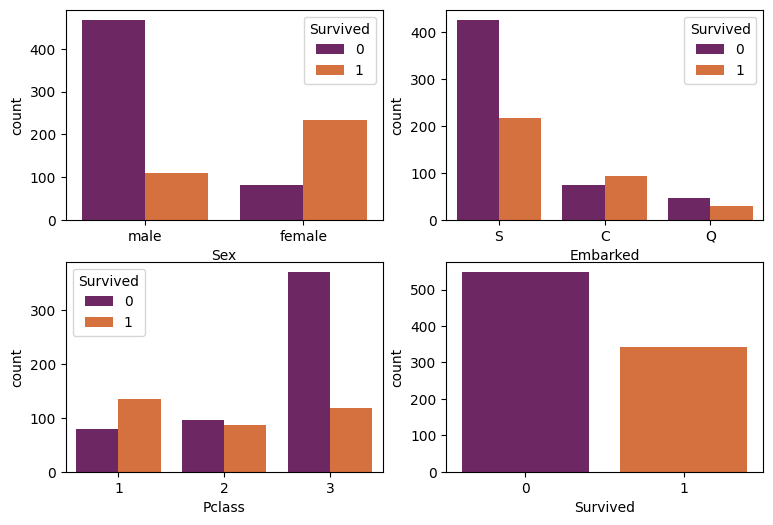

In [125]:
plt.subplots(2,2,figsize=(9,6))

plt.subplot(221)
sns.countplot(data=df, x='Sex',palette='inferno',hue='Survived')


plt.subplot(222)
sns.countplot(data=df, x='Embarked',palette='inferno',hue='Survived')

plt.subplot(223)
sns.countplot(data=df , x='Pclass',palette='inferno',hue='Survived')

plt.subplot(224)
sns.countplot(data=df , x='Survived',palette='inferno',)

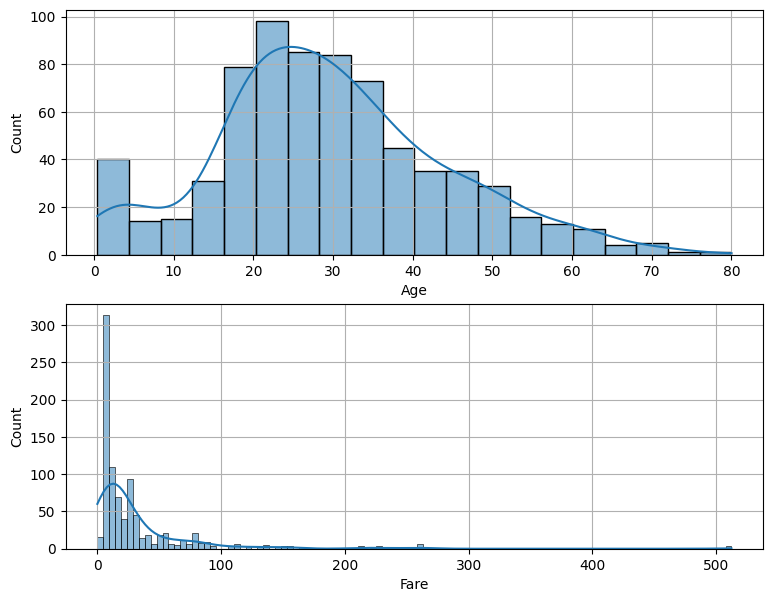

In [126]:
plt.subplots(2,1,figsize=(9,7))

plt.subplot(211)
sns.histplot(data=df ,x='Age',kde=True)

plt.grid()

plt.subplot(212)
sns.histplot(data=df ,x='Fare',kde=True)

plt.grid()

<Axes: xlabel='Fare', ylabel='Count'>

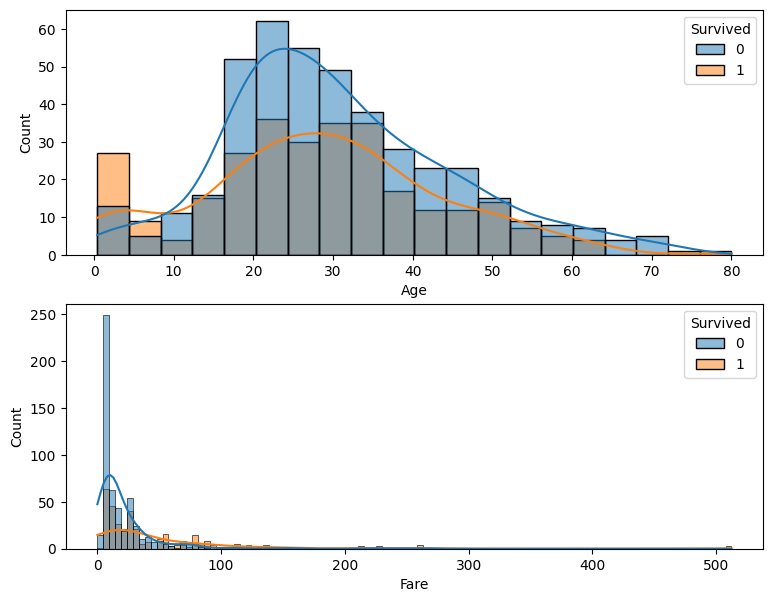

In [127]:
plt.subplots(2,1,figsize=(9,7))

plt.subplot(211)
sns.histplot(data=df ,x='Age',kde=True,hue='Survived')

plt.subplot(212)
sns.histplot(data=df ,x='Fare',kde=True,hue='Survived')

<Axes: xlabel='Fare'>

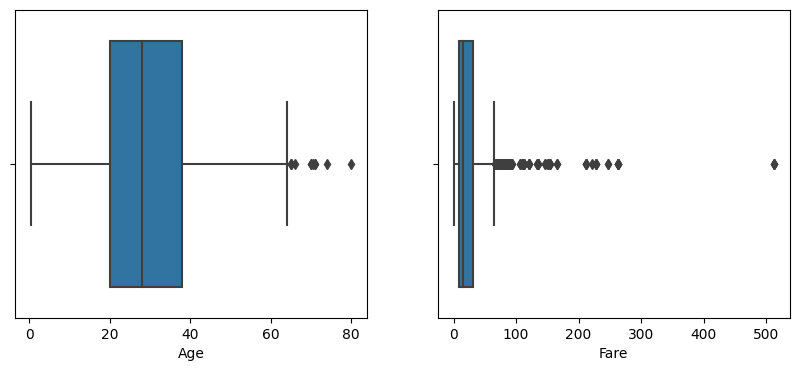

In [128]:
plt.subplots(1,2,figsize=(10,4))

plt.subplot(121)
sns.boxplot(data=df ,x='Age')

plt.subplot(122)
sns.boxplot(data=df ,x='Fare')

In [129]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Fare'>

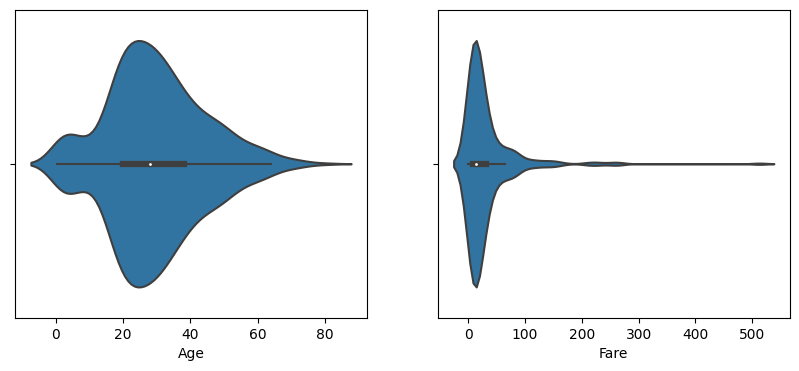

In [130]:
plt.subplots(1,2,figsize=(10,4))

plt.subplot(121)
sns.violinplot(data=df ,x='Age')

plt.subplot(122)
sns.violinplot(data=df ,x='Fare')

<Axes: >

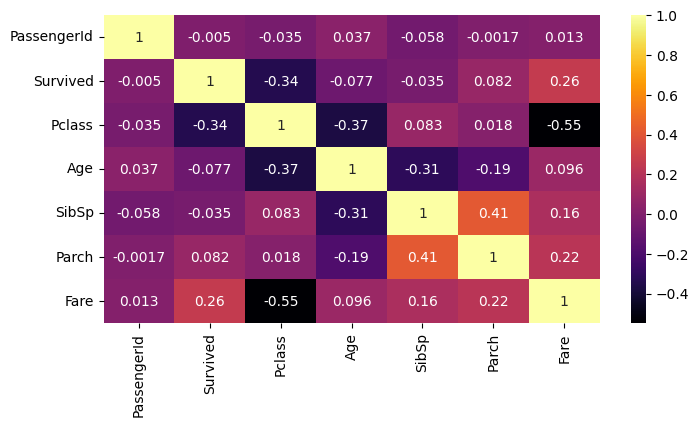

In [131]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True) , annot=True,cmap='inferno')

# 4. Feature engineering / Data Preprocessing

* Feature Transformation
* Feature Construction
* Feature Selection
* Feature Extraction

### Feature transformation

In [132]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
#droping irrelevant columns
df.drop(columns=['PassengerId','Name'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df['Cabin_clas'] = df['Cabin'].str[0]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_clas
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,C
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [135]:
df['Cabin_clas'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [136]:
df.drop(columns=['Cabin'],inplace=True)

In [137]:
df.drop(columns=['Ticket'],inplace=True)

In [138]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_clas
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [139]:
df.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Cabin_clas    687
dtype: int64

#### Filling Null values

In [140]:
#filling null values

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Cabin_clas']=df['Cabin_clas'].fillna(df['Cabin_clas'].mode()[0])

In [141]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_clas    0
dtype: int64

#### Outlier capping

<Axes: xlabel='Fare'>

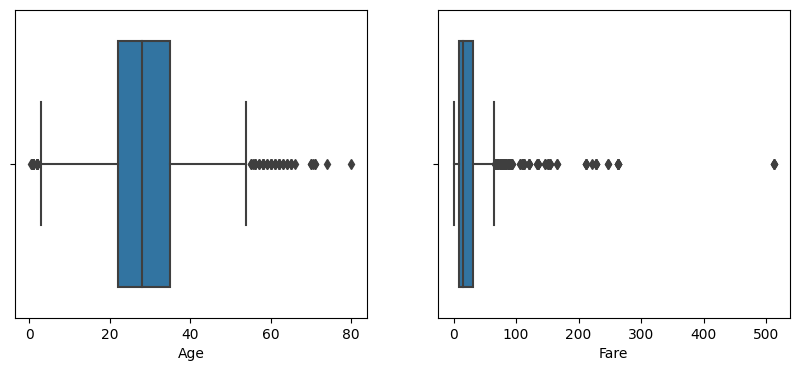

In [142]:
#outlier 
plt.subplots(1,2,figsize=(10,4))

plt.subplot(121)
sns.boxplot(data=df ,x='Age')

plt.subplot(122)
sns.boxplot(data=df ,x='Fare')

In [143]:
Q1 = df['Age'].quantile(0.25)
Q3 =df['Age'].quantile(0.75)
IQR  = Q3-Q1
df['Age'] = np.where(df['Age']>=Q3+1.5*IQR , Q3 , np.where(df['Age']<=Q1-1.5*IQR , Q1 , df['Age']))


In [144]:
Q1 = df['Fare'].quantile(0.25)
Q3 =df['Fare'].quantile(0.75)
IQR  = Q3-Q1
df['Fare'] = np.where(df['Fare']>=Q3+1.5*IQR , Q3 , np.where(df['Fare']<=Q1-1.5*IQR , Q1 , df['Fare']))


<Axes: xlabel='Fare'>

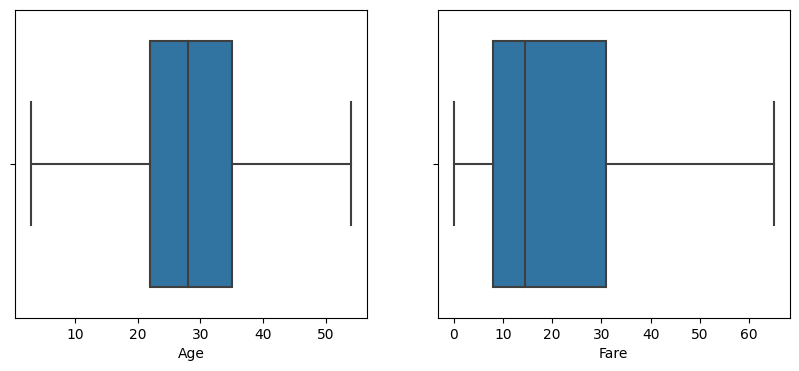

In [145]:
#outlier 
plt.subplots(1,2,figsize=(10,4))

plt.subplot(121)
sns.boxplot(data=df ,x='Age')

plt.subplot(122)
sns.boxplot(data=df ,x='Fare')

In [146]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_clas
0,0,3,male,22.0,1,0,7.250,S,C
1,1,1,female,38.0,1,0,31.000,C,C
2,1,3,female,26.0,0,0,7.925,S,C
3,1,1,female,35.0,1,0,53.100,S,C
4,0,3,male,35.0,0,0,8.050,S,C


### Feature Costruct


In [147]:
df['Family']=np.nan



In [148]:
for i in range(0,len(df)):
    if df['SibSp'][i]==1 or df['Parch'][i]==1:
        df['Family'][i]=1
    else:
        df['Family'][i]=0

In [149]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_clas,Family
0,0,3,male,22.0,1,0,7.250,S,C,1.0
1,1,1,female,38.0,1,0,31.000,C,C,1.0
2,1,3,female,26.0,0,0,7.925,S,C,0.0
3,1,1,female,35.0,1,0,53.100,S,C,1.0
4,0,3,male,35.0,0,0,8.050,S,C,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S,C,0.0
887,1,1,female,19.0,0,0,30.000,S,B,0.0
888,0,3,female,28.0,1,2,23.450,S,C,1.0
889,1,1,male,26.0,0,0,30.000,C,C,0.0


In [150]:
df.drop(columns=['Parch','SibSp'],inplace=True)

In [151]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_clas,Family
0,0,3,male,22.0,7.250,S,C,1.0
1,1,1,female,38.0,31.000,C,C,1.0
2,1,3,female,26.0,7.925,S,C,0.0
3,1,1,female,35.0,53.100,S,C,1.0
4,0,3,male,35.0,8.050,S,C,0.0


### Feature Selection

In [152]:

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_clas,Family
0,0,3,male,22.0,7.250,S,C,1.0
1,1,1,female,38.0,31.000,C,C,1.0
2,1,3,female,26.0,7.925,S,C,0.0
3,1,1,female,35.0,53.100,S,C,1.0
4,0,3,male,35.0,8.050,S,C,0.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Cabin_clas  891 non-null    object 
 7   Family      891 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 55.8+ KB


In [154]:
df['Family']=df['Family'].astype('category')
df['Pclass']=df['Pclass'].astype('category')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    object  
 3   Age         891 non-null    float64 
 4   Fare        891 non-null    float64 
 5   Embarked    891 non-null    object  
 6   Cabin_clas  891 non-null    object  
 7   Family      891 non-null    category
dtypes: category(2), float64(2), int64(1), object(3)
memory usage: 43.9+ KB


###  Categorical to categorical

In [156]:
from scipy.stats import chi2_contingency

In [157]:
cat_list=['Pclass','Sex','Embarked','Cabin_clas','Family']

In [158]:
for i in cat_list:
    grp = pd.crosstab(index=df[i],columns=df['Survived'])
    Chiresult=chi2_contingency(grp)
    print(f'''Pvalue for {i} column is''',Chiresult[1])
    print('______________________________')

Pvalue for Pclass column is 4.549251711298793e-23
______________________________
Pvalue for Sex column is 1.1973570627755645e-58
______________________________
Pvalue for Embarked column is 2.3008626481449577e-06
______________________________
Pvalue for Cabin_clas column is 1.832190289971947e-14
______________________________
Pvalue for Family column is 5.694242681923608e-09
______________________________


All columns are correlated to Survived columns

In [159]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_clas,Family
0,0,3,male,22.0,7.250,S,C,1.0
1,1,1,female,38.0,31.000,C,C,1.0
2,1,3,female,26.0,7.925,S,C,0.0
3,1,1,female,35.0,53.100,S,C,1.0
4,0,3,male,35.0,8.050,S,C,0.0


### Nominal Encoding

In [160]:
df= pd.get_dummies(data=df,columns=['Embarked','Cabin_clas','Sex'],drop_first=True,dtype='int')

In [161]:
df.head()

,Survived,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Cabin_clas_B,Cabin_clas_C,Cabin_clas_D,Cabin_clas_E,Cabin_clas_F,Cabin_clas_G,Cabin_clas_T,Sex_male
0,0,3,22.0,7.250,1.0,0,1,0,1,0,0,0,0,0,1
1,1,1,38.0,31.000,1.0,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.925,0.0,0,1,0,1,0,0,0,0,0,0
3,1,1,35.0,53.100,1.0,0,1,0,1,0,0,0,0,0,0
4,0,3,35.0,8.050,0.0,0,1,0,1,0,0,0,0,0,1


In [162]:
df.shape

(891, 15)

In [163]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


In [164]:
x_train , x_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 14), (712,), (179, 14), (179,))

In [165]:
ss=StandardScaler()
mm=MinMaxScaler()


#since age column is almost gaussian hence using standard scaler on it
x_train['Age']=ss.fit_transform(x_train[['Age']])
x_test['Age']=ss.transform(x_test[['Age']])

#since it is non-gaussian ahence normalizing
x_train['Fare']=mm.fit_transform(x_train[['Fare']])
x_test['Fare']=mm.transform(x_test[['Fare']])


### Ordinal encoding

In [166]:
oe=OrdinalEncoder()

In [167]:
x_train['Pclass']=oe.fit_transform(x_train[['Pclass']])

In [168]:
x_test['Pclass']=oe.transform(x_test[['Pclass']])

In [169]:
x_train.head(3)

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Cabin_clas_B,Cabin_clas_C,Cabin_clas_D,Cabin_clas_E,Cabin_clas_F,Cabin_clas_G,Cabin_clas_T,Sex_male
331,0.0,1.679295,0.438462,0.0,0,1,0,1,0,0,0,0,0,1
733,1.0,-0.571944,0.200000,0.0,0,1,0,1,0,0,0,0,0,1
382,2.0,0.328552,0.121923,0.0,0,1,0,1,0,0,0,0,0,1


# 5. Modelling

## 5.1 Single Models

In [170]:
lg=LogisticRegression(class_weight='balanced')
knn=KNeighborsClassifier(n_neighbors=5)
svc=SVC(kernel='rbf',C=0.1,gamma=0.26)
dt=DecisionTreeClassifier(max_depth=3)

In [171]:
model_list =[lg,knn,svc,dt]
for i in model_list:
    model=i.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    cross_score=cross_val_score(i,x_train,y_train,cv=5,scoring='accuracy')
    cross_mean=np.mean(cross_val_score(i,x_train,y_train,cv=5,scoring='accuracy'))
    print('MODEL',{i})
    print(f'''accuracy of model on train set{i} is ''',accuracy_score(y_train,model.predict(x_train)))
    print('-----------------')
    print(f'''accuracy of model on test set {i} is ''',accuracy)
    print('-----------------')                   
    print(f'''cross_val_score of model {i} is''', cross_score)
    print('-----------------')
    print(f'''mean_cross_val_score of model {i} is,''' ,cross_mean)
    print('----------------------------------------------------------------------------------------------')
    print('                                         ')
    print('                                         ')
    print('                                         ')
    

MODEL {LogisticRegression(class_weight='balanced')}
accuracy of model on train setLogisticRegression(class_weight='balanced') is  0.776685393258427
-----------------
accuracy of model on test set LogisticRegression(class_weight='balanced') is  0.7821229050279329
-----------------
cross_val_score of model LogisticRegression(class_weight='balanced') is [0.78321678 0.79020979 0.76760563 0.73239437 0.78873239]
-----------------
mean_cross_val_score of model LogisticRegression(class_weight='balanced') is, 0.7724317935585541
----------------------------------------------------------------------------------------------
                                         
                                         
                                         
MODEL {KNeighborsClassifier()}
accuracy of model on train setKNeighborsClassifier() is  0.8553370786516854
-----------------
accuracy of model on test set KNeighborsClassifier() is  0.776536312849162
-----------------
cross_val_score of model KNeighborsC

Since among the Single Model Decision tree is working best lets Hypertune it

### Hypertuning Decision Tree

In [172]:
param_grid={'max_depth':[2,3,5,None],
           'criterion':['gini', 'entropy'],
            'min_samples_split':[2,5,10],
           }

In [173]:
GD =GridSearchCV(dt,param_grid=param_grid,cv=5)
GD.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, None],
                         'min_samples_split': [2, 5, 10]})

In [174]:
GD.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [175]:
GD.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [176]:
GD.best_score_

0.810371318822023

For A single Model we can opt Decision Tree

### Ensemble Techinique

### Voting Classifier

In [177]:
estimators=[('lg',lg),('dt',dt),('svc',svc),('knn',knn)]
vc=VotingClassifier(estimators=estimators)
model_vc=vc.fit(x_train,y_train)
model_vc_pred=model_vc.predict(x_test)
accuracy=accuracy_score(y_test,model_vc_pred)
print(f'''Accuracy through voting classier is on test set''',accuracy)
print(f'''Accuracy on train set''',accuracy_score(y_train,model_vc.predict(x_train)))
cross_vc=cross_val_score(vc,x_train,y_train,cv=5,scoring='accuracy')
print(f'''Cross val score for VC is ''',cross_vc)
cross_mean_vc=np.mean(cross_vc)
print(f'''Mean CRoss vc ''',cross_mean)

Accuracy through voting classier is on test set 0.7877094972067039
Accuracy on train set 0.8356741573033708
Cross val score for VC is  [0.82517483 0.81118881 0.78873239 0.76056338 0.82394366]
Mean CRoss vc  0.7977248104008667


### Bagging -Random Forest

In [178]:
rf=RandomForestClassifier(oob_score=True,n_estimators=120,max_depth=6,min_samples_split=15,random_state=0)

model_rf=rf.fit(x_train,y_train)
model_rf_pred=model_rf.predict(x_test)
accuracy=accuracy_score(y_test,model_rf_pred)
print(f'''Accuracy through RF is on test set''',accuracy)
print(f'''Accuracy on train set''',accuracy_score(y_train,model_rf.predict(x_train)))
cross_vc=cross_val_score(rf,x_train,y_train,cv=5,scoring='accuracy')
print(f'''Cross val score for rf is ''',cross_vc)
cross_mean_vc=np.mean(cross_vc)
print(f'''Mean CRoss rf ''',cross_mean)

Accuracy through RF is on test set 0.8044692737430168
Accuracy on train set 0.8595505617977528
Cross val score for rf is  [0.7972028  0.81818182 0.83098592 0.77464789 0.83802817]
Mean CRoss rf  0.7977248104008667


In [179]:
rf.oob_score_

0.8132022471910112

### Hypertuning

In [68]:
param_grid=[{'n_estimators':[25,50,80,100,150,200],
            'criterion':['gini', 'entropy'],
             'max_depth':[2,4,5,8,None],
             'min_samples_split':[5,10,20,None],
             'min_samples_leaf':[5,10,20,None]
            }]

In [69]:
f'''gd_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='accuracy')
model_gd_rf=gd_rf.fit(x_train,y_train)
model_gd_rf_pred=model_gd_rf.predict(x_test)
accuracy=accuracy_score(y_test,model_gd_rf_pred)
print(f'''Accuracy through gdRF is on test set''',accuracy)
print(f'''Accuracy on train set''',accuracy_score(y_train,model_gd_rf.predict(x_train)))
cross_vc=cross_val_score(gd_rf,x_train,y_train,cv=5,scoring='accuracy')
print(f'''Cross val score for gdrf is ''',cross_vc)
cross_mean_vc=np.mean(cross_vc)
print(f'''Mean CRoss gdrf ''',cross_mean)'''

SyntaxError: invalid syntax (968227577.py, line 5)

### Boosting

In [180]:
#gradient Boost
gdb = GradientBoostingClassifier(learning_rate=0.01)

model_gdb=gdb.fit(x_train,y_train)
model_gdb_pred=model_gdb.predict(x_test)
accuracy=accuracy_score(y_test,model_gdb_pred)
print(f'''Accuracy through GDB is on test set''',accuracy)
print(f'''Accuracy on train set''',accuracy_score(y_train,model_gdb.predict(x_train)))
cross_vc=cross_val_score(gdb,x_train,y_train,cv=5,scoring='accuracy')
print(f'''Cross val score for gdb is ''',cross_vc)
cross_mean_vc=np.mean(cross_vc)
print(f'''Mean CRoss gdb ''',cross_mean)

Accuracy through GDB is on test set 0.7932960893854749
Accuracy on train set 0.824438202247191
Cross val score for gdb is  [0.7972028  0.83216783 0.82394366 0.75352113 0.81690141]
Mean CRoss gdb  0.7977248104008667


In [181]:
gdb = AdaBoostClassifier(learning_rate=0.01)

model_gdb=gdb.fit(x_train,y_train)
model_gdb_pred=model_gdb.predict(x_test)
accuracy=accuracy_score(y_test,model_gdb_pred)
print(f'''Accuracy through GDB is on test set''',accuracy)
print(f'''Accuracy on train set''',accuracy_score(y_train,model_gdb.predict(x_train)))
cross_vc=cross_val_score(gdb,x_train,y_train,cv=5,scoring='accuracy')
print(f'''Cross val score for gdb is ''',cross_vc)
cross_mean_vc=np.mean(cross_vc)
print(f'''Mean CRoss gdb ''',cross_mean)

Accuracy through GDB is on test set 0.7821229050279329
Accuracy on train set 0.7879213483146067
Cross val score for gdb is  [0.7972028  0.81118881 0.75352113 0.75352113 0.82394366]
Mean CRoss gdb  0.7977248104008667


In [190]:


model_gdb=xgb.XGBClassifier(enable_categorical=True,n_estimators=50,max_depth=15,learning_rate=0.5,max_leaves=5).fit(x_train,y_train)
model_gdb_pred=model_gdb.predict(x_test)
accuracy=accuracy_score(y_test,model_gdb_pred)
print(f'''Accuracy through GDB is on test set''',accuracy)
print(f'''Accuracy on train set''',accuracy_score(y_train,model_gdb.predict(x_train)))
cross_vc=cross_val_score(gdb,x_train,y_train,cv=5,scoring='accuracy')
print(f'''Cross val score for gdb is ''',cross_vc)
cross_mean_vc=np.mean(cross_vc)
print(f'''Mean CRoss gdb ''',cross_mean)

Accuracy through GDB is on test set 0.7821229050279329
Accuracy on train set 0.898876404494382
Cross val score for gdb is  [0.7972028  0.81118881 0.75352113 0.75352113 0.82394366]
Mean CRoss gdb  0.7977248104008667


In [93]:
x_train.shape

(668, 14)

# TEST

Training on all data


In [94]:
df.head()

,Survived,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Cabin_clas_B,Cabin_clas_C,Cabin_clas_D,Cabin_clas_E,Cabin_clas_F,Cabin_clas_G,Cabin_clas_T,Sex_male
0,0,3,22.0,7.250,1.0,0,1,0,1,0,0,0,0,0,1
1,1,1,38.0,31.000,1.0,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.925,0.0,0,1,0,1,0,0,0,0,0,0
3,1,1,35.0,53.100,1.0,0,1,0,1,0,0,0,0,0,0
4,0,3,35.0,8.050,0.0,0,1,0,1,0,0,0,0,0,1


In [95]:
X=df.iloc[:,1:]
X.head()

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Cabin_clas_B,Cabin_clas_C,Cabin_clas_D,Cabin_clas_E,Cabin_clas_F,Cabin_clas_G,Cabin_clas_T,Sex_male
0,3,22.0,7.250,1.0,0,1,0,1,0,0,0,0,0,1
1,1,38.0,31.000,1.0,0,0,0,1,0,0,0,0,0,0
2,3,26.0,7.925,0.0,0,1,0,1,0,0,0,0,0,0
3,1,35.0,53.100,1.0,0,1,0,1,0,0,0,0,0,0
4,3,35.0,8.050,0.0,0,1,0,1,0,0,0,0,0,1


In [96]:
X['Age']=ss.fit_transform(X[['Age']])
X['Fare']=mm.fit_transform(X[['Fare']])
X['Pclass']=oe.fit_transform(X[['Pclass']])

In [97]:
X.head()

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Cabin_clas_B,Cabin_clas_C,Cabin_clas_D,Cabin_clas_E,Cabin_clas_F,Cabin_clas_G,Cabin_clas_T,Sex_male
0,2.0,-0.668231,0.111538,1.0,0,1,0,1,0,0,0,0,0,1
1,0.0,0.940670,0.476923,1.0,0,0,0,1,0,0,0,0,0,0
2,2.0,-0.266006,0.121923,0.0,0,1,0,1,0,0,0,0,0,0
3,0.0,0.639001,0.816923,1.0,0,1,0,1,0,0,0,0,0,0
4,2.0,0.639001,0.123846,0.0,0,1,0,1,0,0,0,0,0,1


In [98]:
model_rf=RandomForestClassifier(oob_score=True,n_estimators=120,max_depth=6,min_samples_split=15,random_state=42)

model_rf=rf.fit(X,y)

In [99]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [100]:
#prepaaring test set
def prepare(data):
    data=data.drop(columns=['PassengerId','Name','Ticket'])
    data['Cabin_clas']=data['Cabin'].str[0]
    data['Family']=np.nan
    for i in range(0,len(data)):
        if data['SibSp'][i]==1 or data['Parch'][i]==1:
            data['Family'][i]=1
        else:
            data['Family'][i]=0
        
    
    data=data.drop(columns=['SibSp','Parch','Cabin'])
    data['Age']=data['Age'].fillna(data['Age'].median())
    data['Fare']=data['Fare'].fillna(data['Fare'].median())
    data['Cabin_clas']=data['Cabin_clas'].fillna(data['Cabin_clas'].mode()[0])
    data= pd.get_dummies(data=data,columns=['Embarked','Cabin_clas','Sex'],drop_first=True,dtype='int')
    data.insert(12,'Cabin_clas_T',0)
    X = data
    X['Age']=ss.fit_transform(X[['Age']])
    X['Fare']=mm.fit_transform(X[['Fare']])
    X['Pclass']=oe.fit_transform(X[['Pclass']])
    
    return X
    
    

In [101]:
X_test=prepare(df_test)
X_test.head()

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Cabin_clas_B,Cabin_clas_C,Cabin_clas_D,Cabin_clas_E,Cabin_clas_F,Cabin_clas_G,Cabin_clas_T,Sex_male
0,2.0,0.386231,0.015282,0.0,1,0,0,1,0,0,0,0,0,1
1,2.0,1.371370,0.013663,1.0,0,1,0,1,0,0,0,0,0,0
2,1.0,2.553537,0.018909,0.0,1,0,0,1,0,0,0,0,0,1
3,2.0,-0.204852,0.016908,0.0,0,1,0,1,0,0,0,0,0,1
4,2.0,-0.598908,0.023984,1.0,0,1,0,1,0,0,0,0,0,0


### Choosing random forest

In [102]:
prediction=model_rf.predict(X_test)

In [103]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [104]:
Test_results = pd.DataFrame({'PassengerId':df_test.iloc[:,0],
                            'Survived':prediction},index=None)
Test_results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [105]:
submission=Test_results.to_csv('submission.csv')
print('Submission is ready')

Submission is ready


In [106]:
model_rf.feature_importances_

array([0.13298898, 0.08477723, 0.16415151, 0.02465359, 0.01082078,
       0.02538408, 0.0166718 , 0.05408014, 0.01112867, 0.01596287,
       0.00381139, 0.0021718 , 0.00056159, 0.45283557])

('Pclass', 13.298897539643741)
------------------------------------------------------
('Age', 8.477723093441849)
------------------------------------------------------
('Fare', 16.41515146755141)
------------------------------------------------------
('Family', 2.4653585419563218)
------------------------------------------------------
('Embarked_Q', 1.0820782804043378)
------------------------------------------------------
('Embarked_S', 2.538408254271771)
------------------------------------------------------
('Cabin_clas_B', 1.6671797290190975)
------------------------------------------------------
('Cabin_clas_C', 5.408014462439171)
------------------------------------------------------
('Cabin_clas_D', 1.112867284783601)
------------------------------------------------------
('Cabin_clas_E', 1.5962867087419688)
------------------------------------------------------
('Cabin_clas_F', 0.38113874549563287)
------------------------------------------------------
('Cabin_clas_G', 0.217179

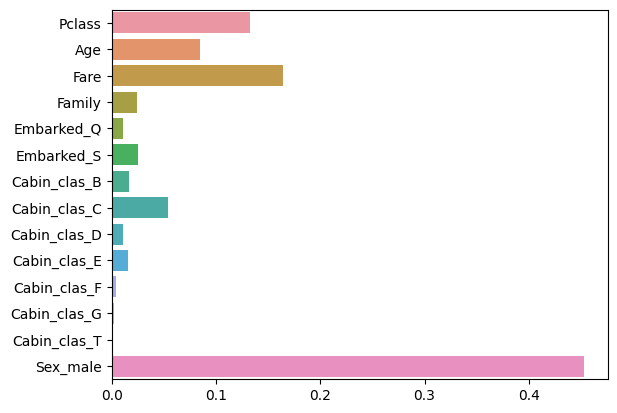

In [107]:
for i,j in zip(X.columns,model_rf.feature_importances_):
    print((i,j*100))
    print('------------------------------------------------------')
    sns.barplot(x=model_rf.feature_importances_,y=X.columns)